1- Downloaded AAPL stock historical data from 01/01/17 and stored to 09/12/19 stored to AAPL.csv file

 Stock Prices from Yahoo Finance 

                  High         Low        Open       Close      Volume   Adj Close
Date                                                                              
2019-09-06  214.419998  212.509995  214.050003  213.259995  19362300.0  213.259995
2019-09-09  216.440002  211.070007  214.839996  214.169998  27309400.0  214.169998
2019-09-10  216.779999  211.710007  213.860001  216.699997  31777900.0  216.699997
2019-09-11  223.710007  217.729996  218.070007  223.589996  44289600.0  223.589996
2019-09-12  226.419998  222.860001  224.800003  223.089996  32226700.0  223.089996


2- Note: AAPL Moving Average steadily rises over the window and does not follow the jagged line of stocks price chart.

 Stock Rolling Mean/Moving Average(50 Day)

2019-09-06    205.2584
2019-09-09    205.5470
2019-09-10    205.9226
2019-09-11    206.3634
2019-09-12    206.7706


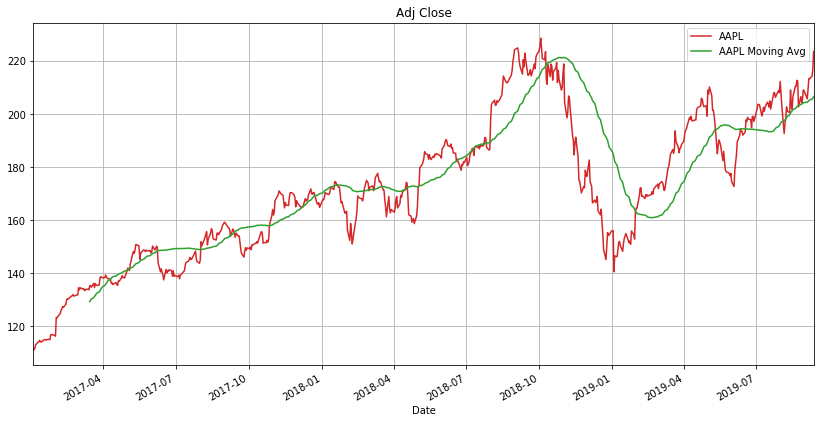

 3- Stock Return Rate 


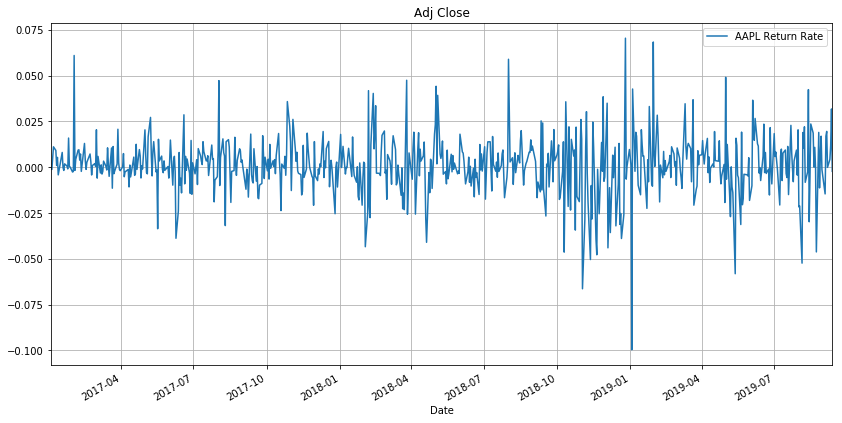

 4-Display Stock Adj Close, Volume, Price(High-Low) % Change, Price(Open-Close) % Change

             Adj Close      Volume    HL_PCT  PCT_change
Date                                                    
2019-09-06  213.259995  19362300.0  0.895622   -0.369077
2019-09-09  214.169998  27309400.0  2.507352   -0.311859
2019-09-10  216.699997  31777900.0  2.339636    1.327970
2019-09-11  223.589996  44289600.0  2.674543    2.531292
2019-09-12  223.089996  32226700.0  1.595767   -0.760679


 5- Regression Data Details

Total data size is 678
Training data size is 542
Test data size is 136
Train Test Split Time is = 2019-03-01 00:00:00

  6- Starting Linear Regression  

 6A- Plot Linear Regression 



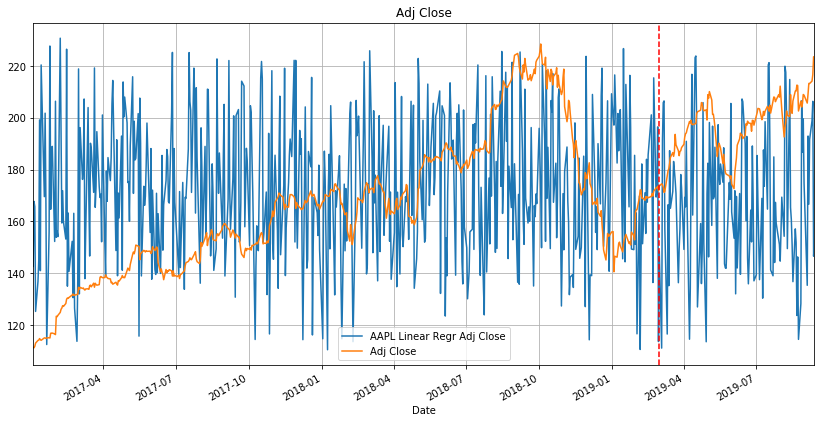

 6B- Linear Regression Coefficients 

  Coeficiencts:  [0.2776292741110954, -0.0719141854738498, -0.10953972287435404, 0.9361562148752813, -5.69030991770525e-09]


 6C- Linear Regression Root Mean Square Error 

     Linear Regression Training RMSE = 1.2860172830216683
     Linear Regression Testing RMSE = 1.2329731671251796


 6D-  Linear Regression Variance 

  Variance:  0.9978514138115487


 6E-  Linear Regression Confidence 

 The linear regression confidence is 0.9978514138115486

  7- Starting Ridge Regression  

 7A- Plot Ridge Regression 



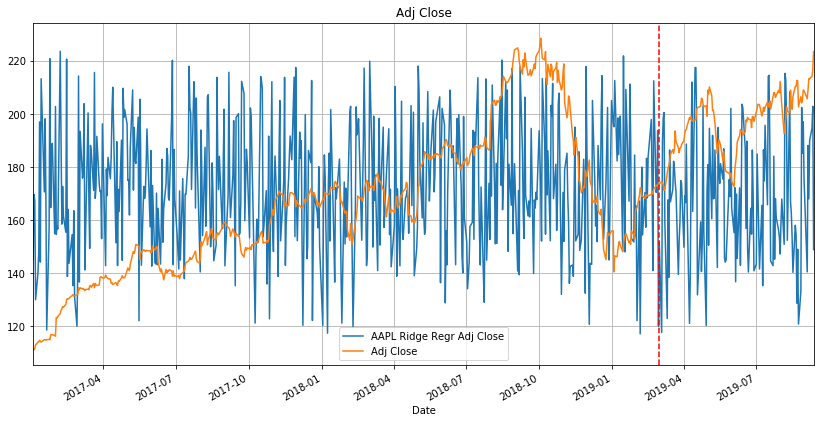

 7B- Ridge Regression Coefficients 

  Coeficiencts:  [0.22648902405967383, 0.23362566216666592, 0.22727370697565555, 0.23363525583436548, 1.4096905135059975e-11]


 7C- Ridge Root Mean Square Error 

     Ridge Regression Training RMSE = 3.4136392439995586
     Ridge Regression Testing RMSE = 3.5494479829601677


 7D-  Ridge Regression Variance 

  Ridge Variance:  0.982193967524747


 7E-  Ridge Regression Confidence 

 The Ridge regression confidence is 0.982193967524747

  8- Starting Lasso Regression  

 8A- Plot Lasso Regression 



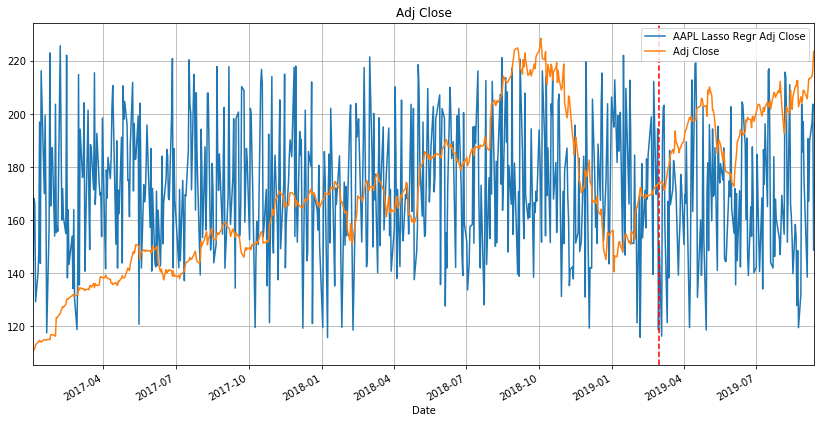

 8B- Lasso Regression Coefficients 

  Coeficiencts:  [0.08744481921251772, 0.001113150257868365, 0.0, 0.8580446874309245, 0.0]


 8C- Lasso Root Mean Square Error 

     Lasso Regression Training RMSE = 2.6666482519845904
     Lasso Regression Testing RMSE = 2.7009124755682725


 8D-  Lasso Regression Variance 

  Lasso Variance:  0.9896898127960921


 8E-  Lasso Regression Confidence 

 The Lasso regression confidence is 0.9896898127960921

  9- Starting KNN Regression  

 9A- Plot KNN Regression 



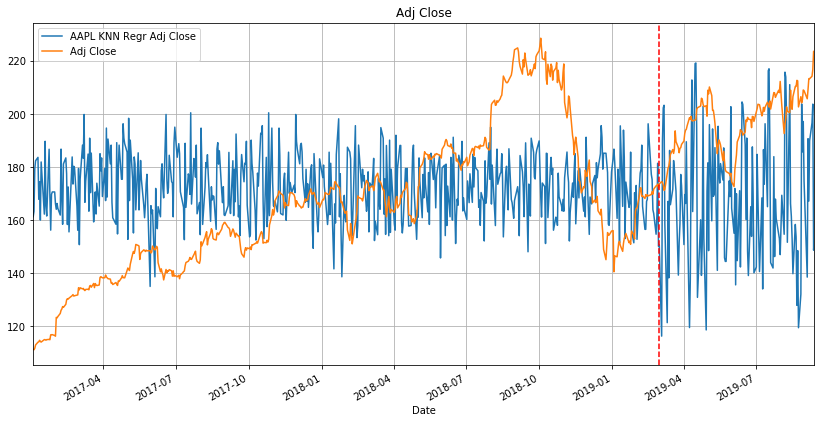

 9B- KNN Regression Coefficients 

   KNN classifier does not expose .coef_ or "feature impoertances_" attributes


 9C- KNN Root Mean Square Error 

     KNN Regression Training RMSE = 24.455964038833166
     KNN Regression Testing RMSE = 29.925751007147262


 9D-  KNN Regression Variance 

  KNN Variance:  -0.2657141794568463


 9E-  KNN Regression Confidence 

 The KNN regression confidence is -0.2657141794568463



In [1]:
# This program predicts stock price using four machine learning regression models
# 1) Creates a .csv file with historical data of the stock
# 2) Calculates and plots stock's Rolling Mean/Moving Average, stock Return rate, high-low %, % change 
# 3) Performs/plots Linear Regression, predicts stock price, calculates rmse, coefficients, variance/confidence
# 4) Performs/plots Ridge Regression, predicts stock price, calculates rmse, coefficients, variance/confidence
# 5) Performs/plots Lasso Regression, predicts stock price, calculates rmse, coefficients, variance/confidence
# 6) Performs/plots KNN Regression, predicts stock price, calculates rmse, variance/confidence

# Import yfinance with alias of yf
import yfinance as yf
# Import numpy as np for large, multi-dimensional arrays, matrices and mathematical functions to operate on these array
import numpy as np
# Import pandas as pd for data manipulation, analysis, data structures and operations for manipulating numerical tables and time series
import pandas as pd
# import external pandas_datareader library with alias of pdr
import pandas_datareader as pdr
# import matplot library with alias of mplt. Pyplot module provides simple functions to add plot elements like lines, images, text, etc. to the current axes in the current figure
import matplotlib.pyplot as mplt
from matplotlib import style
%matplotlib inline
# import datetime internal datetime python module which supplies classes for manipulating dates and times
import datetime
# import math module for mathematical operations can be performed with ease
import math
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
# sklearn.metrics has a mean_squared_error function. The RMSE is just the square root of whatever it returns.
from sklearn.metrics import mean_squared_error
# R^2 (coefficient of determination) regression score function. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
from sklearn.metrics import r2_score
# split the dataset into the training and the testing datasets; train_test_split(x, y, test_size = 0.2, random_state = 0)
from sklearn.model_selection import train_test_split
# LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
from sklearn.linear_model import LinearRegression
#  supervised learning through Ridge regression. In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.
from sklearn.linear_model import Ridge
#  supervised learning through Lasso regression. Lasso performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces 
from sklearn.linear_model import Lasso
# KNN alogrithm uses ‘feature similarity’ to predict values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.
from sklearn.neighbors import KNeighborsRegressor

### define the stock, start date and end date for downloading stock data from Yahoo finance
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2019,9,12)

# Choose the stock ticker symbol
myStock = 'AAPL'

### Extract stock historical data from Yahoo into dataframe
df_Stock = pdr.DataReader(myStock, 'yahoo', start, end)
# Create .csv file with stock historical data
df_Stock.to_csv(myStock + '.csv')
print ('1- Downloaded ' + myStock + ' stock historical data from ' + start.strftime("%x") + ' and stored to ' + end.strftime("%x") + ' stored to ' + myStock + '.csv file' + "\n")
# Display the last 5 records of the stock dataframe
print ('\033[1m \033[4mStock Prices from Yahoo Finance \033[0m' + "\n")
with pd.option_context('expand_frame_repr', False):
    print(df_Stock.tail())
print("\n")

### Plot stock's adjusted close price and moving average
print ('2- Note: ' + myStock + ' Moving Average steadily rises over the window and does not follow the jagged line of stocks price chart.' + "\n")
# Plot stock's adjusted close price
df_Stock["Adj Close"].plot(title=df_Stock.columns[5], label = myStock, color='tab:red', figsize=(14,7), grid = True, legend=True)
# Calculate the Rolling Mean (Moving Average) of the stock to determine the trend
df_Stock_close_pr = df_Stock['Close']
df_Stock_MovingAv = df_Stock_close_pr.rolling(window=50).mean()
# Display the last 5 stock moving average records 
with pd.option_context('expand_frame_repr', False):
    print('\033[1m \033[4mStock Rolling Mean/Moving Average(50 Day)\033[0m'  + "\n")
    print(df_Stock_MovingAv.tail().to_string(header=None))
# Plot Stock's Rolling Mean Moving Averge
df_Stock_MovingAv.plot(title=df_Stock.columns[5], label = myStock + ' Moving Avg', color='tab:green', figsize=(14,7), grid=True, legend=True)
mplt.show()

### Calculate stock's return rate
df_Stock_ret_rate = (df_Stock['Adj Close'] / df_Stock['Adj Close'].shift(1)) - 1
# Display stock's last 5 return rate records 
df_Stock_ret_rate.tail().T
# Plot stock return rate
print('\033[1m \033[4m3- Stock Return Rate \033[0m')
df_Stock_ret_rate.plot(title=df_Stock.columns[-1], label=myStock+' Return Rate', figsize=(14,7), grid=True, legend=True)
mplt.show()

### Feature Engineering
df_Stock_Pr_Regr = df_Stock.loc[:,['Adj Close','Volume']]
df_Stock_Pr_Regr['HL_PCT'] = ((df_Stock['High']-df_Stock['Low'])/df_Stock['Close']) * 100.0
df_Stock_Pr_Regr['PCT_change'] = ((df_Stock['Close']-df_Stock['Open'])/df_Stock['Open']) * 100.0
# Display the last 5 records of the dataframe
print('\033[1m \033[4m4-Display Stock Adj Close, Volume, Price(High-Low) % Change, Price(Open-Close) % Change\033[0m' + "\n")
with pd.option_context('expand_frame_repr', False):
    print(df_Stock_Pr_Regr.tail())
print("\n")

print('\033[1m \033[4m5- Regression Data Details\033[0m' '\n')
# Split 80% data to train and 20% data to test the model
Total_Data_Ind = df_Stock.shape[0]
print('Total data size is ' + str(Total_Data_Ind))
train_size = 0.8
#Keep 80% data for training
Train_Data_Ind = int(train_size * Total_Data_Ind)
print('Training data size is ' + str(Train_Data_Ind))
#Keep 20% data for testing
Test_Data_Ind = Total_Data_Ind - Train_Data_Ind
print('Test data size is ' + str(Test_Data_Ind))
Train_test_split_time = df_Stock.index[Train_Data_Ind]
print('Train Test Split Time is = ' + str(Train_test_split_time) + '\n')

# Create X and y train data sets to train the model
X_daterange = df_Stock.iloc[:,:-1].to_numpy()
y_closepx = df_Stock.iloc[:,-1].to_numpy()

# Split into 80% train data and 20 % test data
X_daterange_train, X_daterange_test, y_closepx_train, y_closepx_test = train_test_split(X_daterange, y_closepx, train_size = 0.8)

##################### Linear Regression ##############################################################################

print ('\x1b[43m \033[1m \033[4m6- Starting Linear Regression \033[0m \x1b[0m' '\n')

# Create Linear Regression Estimator/Model Object for training, testing/prediction
LinReg_Model = LinearRegression(n_jobs= -1)

# Train the Liner Regression model using training set
LinReg_Model.fit(X_daterange_train, y_closepx_train)

# Test to predict with this model using training data 
Training_Predications = LinReg_Model.predict(X_daterange_train).reshape(-1,1)

# Test to predict with this model using test data
Test_Predictions = LinReg_Model.predict(X_daterange_test).reshape(-1,1)

# Combine the training and testing predictions; Joining the two arrays along axis 0
All_Predictions = np.concatenate((Training_Predications, Test_Predictions), axis=0)

# transform the prediction data to dataframe and plot the prediction results and train/test split timing line, 
df_lin_reg = pd.DataFrame(All_Predictions, columns=[myStock+' Linear Regr '+df_Stock.columns[-1]], index=df_Stock.index)
df_lin_reg[df_Stock.columns[-1]] = y_closepx
# plot the results of linear regression
df_lin_reg.plot(title=df_Stock.columns[-1], label=myStock+'_Linear Regression', figsize=(14,7), grid=True, legend=True)
# Add the train and test split timing line
mplt.axvline(pd.Timestamp(Train_test_split_time),color='r', linestyle='--')
print('\033[1m \033[4m6A- Plot Linear Regression \033[0m' '\n')
mplt.show()

# calculate the coefficients 
print('\033[1m \033[4m6B- Linear Regression Coefficients \033[0m' '\n')
print('  Coeficiencts: ', list(LinReg_Model.coef_))
print('\n')

# calculate root mean squared error 
Training_rmse = sqrt(mean_squared_error(y_closepx_train.reshape(-1,1), Training_Predications))
Test_rmse = sqrt(mean_squared_error(y_closepx_test.reshape(-1,1), Test_Predictions))
print('\033[1m \033[4m6C- Linear Regression Root Mean Square Error \033[0m' '\n')
print('     Linear Regression Training RMSE = ' + str(Training_rmse))
print('     Linear Regression Testing RMSE = ' + str(Test_rmse))
print('\n')

# calculate the variance which is squared deviation of a variable from its mean. 
#A low value for variance indicates that the data are clustered together and are not spread apart widely, 
# whereas a high value would indicate that the data in the given set are much more spread apart from the average value.  
print('\033[1m \033[4m6D-  Linear Regression Variance \033[0m' '\n')
print('  Variance: ', r2_score(y_closepx_test, Test_Predictions))
print('\n')

### Use the score method to evaluate the trained model 
# The score method finds the mean accuracy of self.predict(X) with y of the test data set.
Confidence_Score = LinReg_Model.score(X_daterange_test, y_closepx_test)
print('\033[1m \033[4m6E-  Linear Regression Confidence \033[0m' '\n')
print(' The linear regression confidence is ' + str(Confidence_Score) + '\n') 

##################### Ridge Regression ##############################################################################
# Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. 
# By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors.
# Create Ridge Estimator/Model Object for training, testing/prediction

print ('\x1b[43m \033[1m \033[4m7- Starting Ridge Regression \033[0m \x1b[0m' '\n')

RidgeReg_Model = Ridge(alpha=.5,normalize=True)
RidgeReg_Model.fit(X_daterange_train, y_closepx_train)

# Test to predict with this model using training data 
Ridge_Training_Predications = RidgeReg_Model.predict(X_daterange_train).reshape(-1,1)

# Test to predict with this model using test data
Ridge_Test_Predictions = RidgeReg_Model.predict(X_daterange_test).reshape(-1,1)

# Combine the training and testing predictions; Joining the two arrays along axis 0
Ridge_All_Predictions = np.concatenate((Ridge_Training_Predications, Ridge_Test_Predictions), axis=0)

# transform the prediction data to dataframe and plot the prediction results and train/test split timing line, 
df_Ridge_reg = pd.DataFrame(Ridge_All_Predictions, columns=[myStock+' Ridge Regr '+df_Stock.columns[-1]], index=df_Stock.index)
df_Ridge_reg[df_Stock.columns[-1]] = y_closepx
# plot the results of Ridge regression
df_Ridge_reg.plot(label=myStock+'_Ridge Regression', figsize=(14,7), title=df_Stock.columns[-1], grid=True, legend=True)
Train_test_split_time = df_Stock.index[Train_Data_Ind]
# Add the train and test split timing line
mplt.axvline(pd.Timestamp(Train_test_split_time),color='r', linestyle='--')
print('\033[1m \033[4m7A- Plot Ridge Regression \033[0m' '\n')
mplt.show()

# calculate the coefficients 
print('\033[1m \033[4m7B- Ridge Regression Coefficients \033[0m' '\n')
print('  Coeficiencts: ', list(RidgeReg_Model.coef_))
print('\n')

# calculate root mean squared error 
Ridge_Training_rmse = sqrt(mean_squared_error(y_closepx_train.reshape(-1,1), Ridge_Training_Predications))
Ridge_Test_rmse = sqrt(mean_squared_error(y_closepx_test.reshape(-1,1), Ridge_Test_Predictions))
print('\033[1m \033[4m7C- Ridge Root Mean Square Error \033[0m' '\n')
print('     Ridge Regression Training RMSE = ' + str(Ridge_Training_rmse))
print('     Ridge Regression Testing RMSE = ' + str(Ridge_Test_rmse))
print('\n')

# calculate the variance which is squared deviation of a variable from its mean. 
#A low value for variance indicates that the data are clustered together and are not spread apart widely, 
# whereas a high value would indicate that the data in the given set are much more spread apart from the average value.  
print('\033[1m \033[4m7D-  Ridge Regression Variance \033[0m' '\n')
print('  Ridge Variance: ', r2_score(y_closepx_test, Ridge_Test_Predictions))
print('\n')

### Use the score method to evaluate the trained model 
# The score method finds the mean accuracy of self.predict(X) with y of the test data set.
Ridge_Confidence_Score = RidgeReg_Model.score(X_daterange_test, y_closepx_test)
print('\033[1m \033[4m7E-  Ridge Regression Confidence \033[0m'  '\n')
print(' The Ridge regression confidence is ' + str(Ridge_Confidence_Score) + '\n') 

##################### Lasso Regression ##############################################################################
# Lasso uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean.
# When alpha is 0 , Lasso produces same coefficients as linear regression. When alpha is very very large, all coefficients are zero.
# Create Ridge Estimator/Model Object for training, testing/prediction

print ('\x1b[43m \033[1m \033[4m8- Starting Lasso Regression \033[0m \x1b[0m' '\n')

LassoReg_Model = Lasso(alpha=.1,normalize=True)
LassoReg_Model.fit(X_daterange_train, y_closepx_train)

# Test to predict with this Lasso model using training data 
Lasso_Training_Predications = LassoReg_Model.predict(X_daterange_train).reshape(-1,1)

# Test to predict with this Lasso model using test data
Lasso_Test_Predictions = LassoReg_Model.predict(X_daterange_test).reshape(-1,1)

# Combine the training and testing predictions; Joining the two arrays along axis 0
Lasso_All_Predictions = np.concatenate((Lasso_Training_Predications, Lasso_Test_Predictions), axis=0)

# transform the prediction data to dataframe and plot the prediction results and train/test split timing line, 
df_Lasso_reg = pd.DataFrame(Lasso_All_Predictions, columns=[myStock+' Lasso Regr '+df_Stock.columns[-1]], index=df_Stock.index)
df_Lasso_reg[df_Stock.columns[-1]] = y_closepx
# plot the results of Ridge regression
df_Lasso_reg.plot(label=myStock+'_Lasso Regression', figsize=(14,7), title=df_Stock.columns[-1], grid=True, legend=True)
Train_test_split_time = df_Stock.index[Train_Data_Ind]
# Add the train and test split timing line
mplt.axvline(pd.Timestamp(Train_test_split_time),color='r', linestyle='--')
print('\033[1m \033[4m8A- Plot Lasso Regression \033[0m' '\n')
mplt.show()

# calculate the coefficients 
print('\033[1m \033[4m8B- Lasso Regression Coefficients \033[0m' '\n')
print('  Coeficiencts: ', list(LassoReg_Model.coef_))
print('\n')

# calculate root mean squared error 
Lasso_Training_rmse = sqrt(mean_squared_error(y_closepx_train.reshape(-1,1), Lasso_Training_Predications))
Lasso_Test_rmse = sqrt(mean_squared_error(y_closepx_test.reshape(-1,1), Lasso_Test_Predictions))
print('\033[1m \033[4m8C- Lasso Root Mean Square Error \033[0m' '\n')
print('     Lasso Regression Training RMSE = ' + str(Lasso_Training_rmse))
print('     Lasso Regression Testing RMSE = ' + str(Lasso_Test_rmse))
print('\n')

# calculate the variance which is squared deviation of a variable from its mean. 
#A low value for variance indicates that the data are clustered together and are not spread apart widely, 
# whereas a high value would indicate that the data in the given set are much more spread apart from the average value. 
print('\033[1m \033[4m8D-  Lasso Regression Variance \033[0m' '\n')
print('  Lasso Variance: ', r2_score(y_closepx_test, Lasso_Test_Predictions))
print('\n')

### Use the score method to evaluate the trained model 
# The score method finds the mean accuracy of self.predict(X) with y of the test data set.
Lasso_Confidence_Score = LassoReg_Model.score(X_daterange_test, y_closepx_test)
print('\033[1m \033[4m8E-  Lasso Regression Confidence \033[0m'  '\n')
print(' The Lasso regression confidence is ' + str(Lasso_Confidence_Score) + '\n') 

##################### KNN - K Nearest Neighbor Regression ##########################################################
# K nearest neighbors is a simple algorithm that stores all available cases and predict the numerical target based on a similarity measure (e.g., distance functions). 
# Create KNN Estimator/Model Object for training, testing/prediction

print ('\x1b[43m \033[1m \033[4m9- Starting KNN Regression \033[0m \x1b[0m' '\n')

KNNReg_Model = KNeighborsRegressor(n_neighbors=5)
KNNReg_Model.fit(X_daterange_train, y_closepx_train)

# Test to predict with this KNN model using training data 
KNN_Training_Predications = KNNReg_Model.predict(X_daterange_train).reshape(-1,1)

# Test to predict with this KNN model using test data
KNN_Test_Predictions = KNNReg_Model.predict(X_daterange_test).reshape(-1,1)

# Combine the training and testing predictions; Joining the two arrays along axis 0
KNN_All_Predictions = np.concatenate((KNN_Training_Predications, Lasso_Test_Predictions), axis=0)

# transform the prediction data to dataframe and plot the prediction results and train/test split timing line, 
df_KNN_reg = pd.DataFrame(KNN_All_Predictions, columns=[myStock+' KNN Regr '+df_Stock.columns[-1]], index=df_Stock.index)
df_KNN_reg[df_Stock.columns[-1]] = y_closepx
# plot the results of Ridge regression
df_KNN_reg.plot(label=myStock+'_KNN Regression', figsize=(14,7), title=df_Stock.columns[-1], grid=True, legend=True)
Train_test_split_time = df_Stock.index[Train_Data_Ind]
# Add the train and test split timing line
mplt.axvline(pd.Timestamp(Train_test_split_time),color='r', linestyle='--')
print('\033[1m \033[4m9A- Plot KNN Regression \033[0m' '\n')
mplt.show()

# calculate the coefficients 
print('\033[1m \033[4m9B- KNN Regression Coefficients \033[0m' '\n')
#print('  Coeficiencts: ', KNNReg_Model.coef_)
print('   KNN classifier does not expose .coef_ or "feature impoertances_" attributes')
print('\n')

# calculate root mean squared error 
KNN_Training_rmse = sqrt(mean_squared_error(y_closepx_train.reshape(-1,1), KNN_Training_Predications))
KNN_Test_rmse = sqrt(mean_squared_error(y_closepx_test.reshape(-1,1), KNN_Test_Predictions))
print('\033[1m \033[4m9C- KNN Root Mean Square Error \033[0m' '\n')
print('     KNN Regression Training RMSE = ' + str(KNN_Training_rmse))
print('     KNN Regression Testing RMSE = ' + str(KNN_Test_rmse))
print('\n')

# calculate the variance which is squared deviation of a variable from its mean. 
#A low value for variance indicates that the data are clustered together and are not spread apart widely, 
# whereas a high value would indicate that the data in the given set are much more spread apart from the average value. 
print('\033[1m \033[4m9D-  KNN Regression Variance \033[0m' '\n')
print('  KNN Variance: ', r2_score(y_closepx_test, KNN_Test_Predictions))
print('\n')

### Use the score method to evaluate the trained model 
# The score method finds the mean accuracy of self.predict(X) with y of the test data set.
KNN_Confidence_Score = KNNReg_Model.score(X_daterange_test, y_closepx_test)
print('\033[1m \033[4m9E-  KNN Regression Confidence \033[0m'  '\n')
print(' The KNN regression confidence is ' + str(KNN_Confidence_Score) + '\n') 